In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('train.csv')
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [18]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

In [42]:
X = df.drop('label', axis = 1)
y = df['label'].copy()

In [43]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [56]:
spliter = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3)

for train_index, test_index in spliter.split(X, y):
    strat_train_x = X.loc[train_index]
    strat_train_y = y.loc[train_index]
    strat_test_x = X.loc[test_index]
    strat_test_y = y.loc[test_index]

In [57]:
y.value_counts().sort_index(ascending = True)/len(y)

0    0.098381
1    0.111524
2    0.099452
3    0.103595
4    0.096952
5    0.090357
6    0.098500
7    0.104786
8    0.096738
9    0.099714
Name: label, dtype: float64

In [58]:
y_train.value_counts().sort_index(ascending = True)/len(y_train)

0    0.100102
1    0.109592
2    0.099592
3    0.104048
4    0.095986
5    0.089150
6    0.099830
7    0.104354
8    0.097109
9    0.100238
Name: label, dtype: float64

In [59]:
strat_train_y.value_counts().sort_index(ascending = True)/len(strat_train_y)

0    0.098367
1    0.111531
2    0.099456
3    0.103605
4    0.096939
5    0.090340
6    0.098503
7    0.104796
8    0.096735
9    0.099728
Name: label, dtype: float64

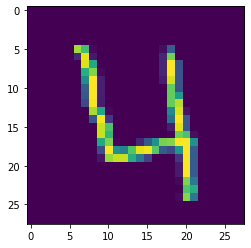

In [63]:
plt.imshow(X.loc[3].values.reshape(28, 28))